In [43]:
# Imports and initial exploration of the dataset. 

import pandas as pd
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # for plotting
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder

In [75]:
df = pd.read_csv('/Users/Michele/Documents/GitHub/wine_price_predictions/winwinewine/winemag-data-130k-v2.csv')
#print(df.info())
#print(df.head())

In [4]:
df.describe() # these are the only numerical columns so far that is why it only shows 3. 

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [5]:
labels = list(df.columns.values)
print(labels)

['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [38]:
# --- Cleaning the data ---

#1: Get rid of useless columns.  

df_cleaned=df.drop(['Unnamed: 0','description','title'],axis=1)
#print(df_cleaned.info())

#2: Get rid of extreme outliers since it will worsen the predictions.

cleaned = df_cleaned.price <= 100
pricesBelow100 = df_cleaned.price[cleaned]

print(len(pricesBelow100))

#3: Replace NaN's with average price of the dataset.

'NaN' in pricesBelow100 # we don't need to because limiting the price to 100 already did it for us. 


117609


False

In [29]:
#pd.unique(df_cleaned.price)

In [21]:
#df_cleaned.price.describe()

In [54]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [64]:
#4: Make categorical attributes numerical so that they can be used in a model. 

df2 = df_cleaned.iloc[:117609,:] # doing this in order to exlcude the extreme values. 

#in order to check again if this was successful:
#'NaN' in df2['price'] <--- it worked because it returned false 

#'NaN' in df2 <--- false - awesome :) 

# includes all except: price, points and title. Title will need to be precprocessed differently. 
categorical_features = ['country','designation','province', 'region_1', 'region_2', 'variety', 'winery', 'taster_name', 'taster_twitter_handle']



#--------------------- got stuck below here -----------------------


# Before we can encode we need to have either string type or int type...obviously we want str first.

#df2[categorical_features] = df[categorical_features].astype('|S') <--- UnicodeEncodeError 

#df2[categorical_features] = df2[categorical_features].astype('|S80') <--- SystemError: <class 'UnicodeEncodeError'> returned a result with an error set


#encoder = LabelEncoder()

# Apply the label encoder to each column
#encoded = df2[categorical_features].apply(encoder.fit_transform)
#encoded.head(10)

#MultiColumnLabelEncoder(columns = ['country']).fit_transform(df2)

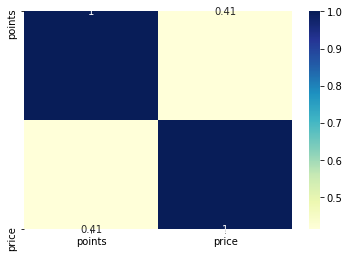

In [65]:
correlation = df2.corr()
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.show()

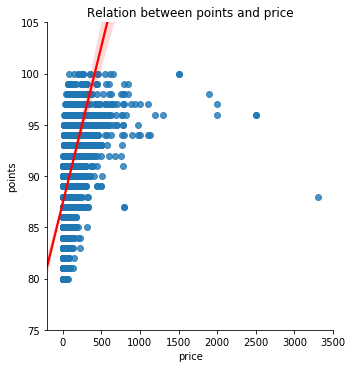

In [71]:
sns.lmplot(x='price', y="points", data=df2,line_kws={'color': 'red'})
text="Relation between points and price"   
plt.title(text)
plt.ylim(75, 105)

plt.show()

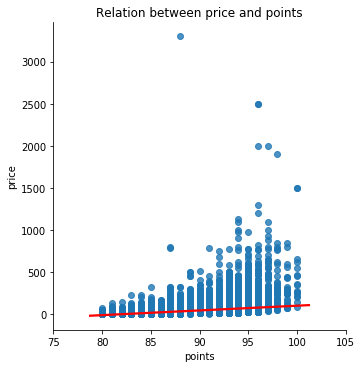

In [72]:
sns.lmplot(x='points', y="price", data=df2,line_kws={'color': 'red'})
text="Relation between price and points"   
plt.title(text)
plt.xlim(75, 105)

plt.show()

In [82]:
df2.groupby('points')['price'].count()

points
80       354
81       631
82      1637
83      2536
84      5401
85      8228
86     10638
87     14588
88     14511
89     10277
90     12807
91      9564
92      7917
93      5295
94      3105
95      1265
96       419
97       163
98        58
99        23
100       16
Name: price, dtype: int64

In [106]:
X = df2['points']

y = df2['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


lr = LinearRegression().fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

print('training score: ',lr.score(X_train,y_train), 'test score: ',lr.score(X_test,y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [105]:
'NaN' in df2['points']

False